Пора без каких - либо условий

In [16]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from py_utils.generate_pore_in_files import generate_pore_in_files

In [17]:
N = 300
S = 100
Cs = 0.001
alpha = 0.5
D = np.linspace(200, 110, num = 4)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.986257e+00 |g| = 9.825356e+00 alpha = 1.000000e+00 
hessian scaling: 2.45966
it =  1  E = 2.650023e+00 |g| = 8.511105e+00 alpha = 1.101777e-01 
it =  2  E = 2.273676e+00 |g| = 8.721051e+00 alpha = 1.445982e-01 
it =  3  E = 1.384101e+01 |g| = 8.183936e+00 alpha = 3.385499e-03 
it =  4  E = 3.324477e+00 |g| = 8.293799e+00 alpha = 5.553569e-02 
it =  5  E = 9.376420e+00 |g| = 8.561511e+00 alpha = 7.738530e-03 
it =  6  E = 4.696063e+00 |g| = 8.676279e+00 alpha = 2.922792e-02 
it =  7  E = 9.072398e+00 |g| = 8.800389e+00 alpha = 8.512216e-03 
it =  8  E = 7.951711e+00 |g| = 8.828674e+00 alpha = 1.038769e-02 
it =  9  E = 2.487664e+01 |g| = 8.874265e+00 alpha = 1.141928e-03 
it =  10  E = 1.316411e+01 |g| = 8.870764e+00

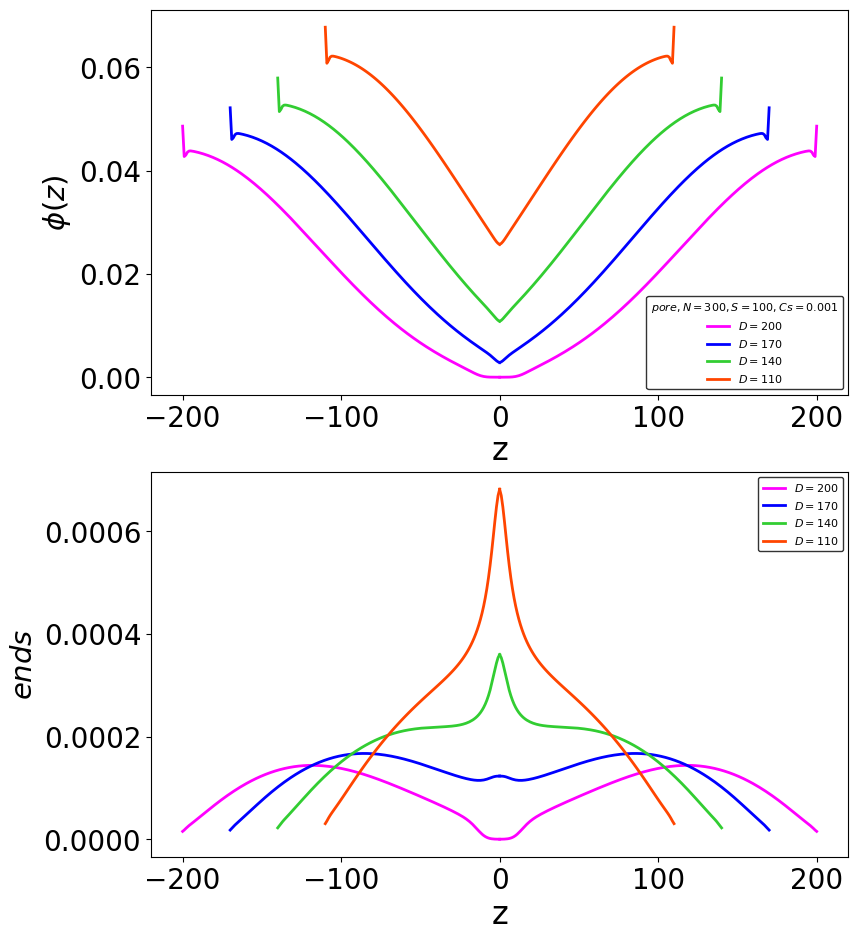

In [18]:
colors = ['fuchsia', 'blue', 'limegreen', 'orangered', 'orange', 'skyblue', 'slateblue', 'black', 'hotpink',
              'crimson', 'aquamarine']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for d, color in zip(D, colors):
    file_name_pro_pore = generate_pore_in_files(template_pore = '/home/tpopova/prj/PB_SCF/pore_templates/pore_template.in',
                   
                   #название параметра
                   range_param = 'D',

                   N_brush = N,
                   S = S,
                   Cs = Cs,
                   alpha = alpha,
                   D = round(d),
                   min_range_value = min(D),
                   max_range_value = max(D),
                    )

    c_polymer_pore = np.asarray(pd.read_csv(file_name_pro_pore, sep='\t')['mol_pol_phi'])

    ends_pore = np.asarray(pd.read_csv(file_name_pro_pore, sep='\t')['mon_E_phi'])
    
    r_range = np.linspace(0, round(d), num = round(d))
    
        
    ax1.plot(r_range, c_polymer_pore,
                linestyle='-',
                linewidth= 2,
                color=color,
                label=f'$D = {round(d)}$')
    
    ax1.plot(-1 * r_range, c_polymer_pore,
                linestyle='-',
                linewidth= 2,
                color=color)
    
    ax2.plot(r_range, ends_pore,
            linestyle='-',
            linewidth= 2,
            color=color,
            label=f'$D = {round(d)}$')
    
    ax2.plot(-1 * r_range, ends_pore,
            linestyle='-',
            linewidth= 2,
            color=color)

#  Добавляем подписи к осям:
ax1.set_xlabel('z',
                fontsize=23,  
                color='black', labelpad=2.5) 

ax1.set_ylabel(r'$\phi(z)$',
                fontsize=21, 
                color='black')
ax2.set_xlabel('z',
                fontsize=23, 
                color='black') 

ax2.set_ylabel('$ends$',
                fontsize=21,
                color='black') 

# legend
ax1.legend(title = f'$pore, N = {N}, S = {S}, Cs = {Cs}$',
    fontsize=8,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии
            title_fontsize='8',  # размер шрифта заголовка
            loc = 'lower right')
# legend
ax2.legend(fontsize=8,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии   #  заголовок
            title_fontsize='8', loc = 'upper right'  # размер шрифта заголовка
            )

fig.set_figwidth(9)
fig.set_figheight(11)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.show()